Debug log
round: 

In [4]:
import pyomo.environ as pyomo

model = pyomo.ConcreteModel()

model.x1 = pyomo.Var(domain=pyomo.NonNegativeReals)
model.x2 = pyomo.Var(domain=pyomo.NonNegativeReals)

model.c = pyomo.ConstraintList()
model.c.add(model.x1*10+1>=model.x2)
model.c.add(model.x1*(0.2)+4>=model.x2)
model.c.add(model.x1*(-0.2)+6>=model.x2)

for i in range(2):
    model.objective = pyomo.Objective(rule = lambda model: model.x1 +model.x2*10, sense = pyomo.maximize)
    solver = pyomo.SolverFactory("cbc") # "cbc", "gurobi"
    result = solver.solve(model)
    print(pyomo.value(model.x1))
    model.objective.deactivate()
    del model.objective

# print(result)
# print(model.x1(), model.x2())
# print(model.display())

5.0
5.0


In [ ]:
import pandas
import sys
from pyomo.environ import *
#readthedatafromexcelusingpandas
df=pandas.read_excel(sys.argv[1],'DeliveryCosts', header=0,index_col=0)
N =list(df.index.map(str))
M =list(df.columns.map(str))
d={(r,c):df.at[r,c]for r in N for c in M}
P =int(sys.argv[2])
#createthemodel(couldbeimported)
model=ConcreteModel(name="(WL)")
model.x=Var(N,M,bounds=(0,1))
model.y=Var(N,within=Binary)
def obj_rule(model):
    return sum(d[n,m]*model.x[n,m]for n in N for m in M)
model.obj=Objective(rule=obj_rule)
def one_per_cust_rule(model,m):
    return sum(model.x[n,m] for n in N) ==1
model.one_per_cust=Constraint(M,rule=one_per_cust_rule)
def warehouse_active_rule(model,n,m):
    return model.x[n,m]<=model.y[n]
model.warehouse_active=Constraint(N, M, rule=warehouse_active_rule)
def num_warehouses_rule(model):
    return sum(model.y[n] for n in N) <=P
model.num_warehouses=Constraint(rule=num_warehouses_rule)
#solvethemodelandreporttheresults
solver=SolverFactory('glpk')
solver.solve(model)
model.pprint()

FileNotFoundError: [Errno 2] No such file or directory: '--f=/run/user/1000/jupyter/runtime/kernel-v3436918cc320fd700637cd711da91453d5d631d84.json'

In [ ]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory
model = pyo.ConcreteModel()
model.x = pyo.Var([1,2], domain=pyo.NonNegativeReals)
model.OBJ = pyo.Objective(expr = 2*model.x[1] + 3*model.x[2])
model.Constraint1 = pyo.Constraint(expr = 3*model.x[1] + 4*model.x[2] >= 1)

opt = SolverFactory('ipopt')
# opt.set_instance(model)
results = opt.solve(model)

print(f"x[1] = {pyo.value(model.x[1])}")
print(f"x[2] = {pyo.value(model.x[2])}")

x[1] = 0.3333333343980947
x[2] = -2.3605492901504038e-09


In [3]:
from pyomo.environ import *
 
N=[1,2]
M=[1,2]
c={1:1,2:2}
a={(1,1):3, (1,2):4,(2,1):2,(2,2):5}
b={1:1,2:2}

model=ConcreteModel()
model.x=Var(N,within=NonNegativeReals)
def obj_rule(model):
    sumt=0
    for i in N:
        sumt += c[i]*model.x[i]
    return sumt
    # return sum(c[i]*model.x[i] for i in N)
model.obj =Objective(rule=obj_rule)
def con_rule(model, m):
    return sum(a[m,i]*model.x[i] for i in N) >= b[m]
model.con =Constraint(M,rule=con_rule)

opt = SolverFactory('ipopt')
# opt.set_instance(model)
results = opt.solve(model)
print(value(model.x[1]))

2.3913321520005633e-09


In [17]:
 #
 # Graph coloring example adapted from
 #
 # Jonathan L. Gross and Jay Yellen ,
 # ”Graph Theory and Its Applications , 2nd Edition”,
 # Chapman & Hall /CRC, Boca Raon, FL, 2006.
 #

 # Define data for the graph of interest .
vertices = set ([ 'Ar' , 'Bo' ,'Br' , 'Ch' , 'Co' , 'Ec' , \
                 'FG' , 'Gu' , 'Pa' , 'Pe' , 'Su' , 'Ur' , 'Ve'])
edges = set ([( 'FG' , 'Su') , ('FG' , 'Br') , ('Su' , 'Gu') ,\
( 'Su' , 'Br') , ( 'Gu' , 'Ve') , ( 'Gu' , 'Br'),\
    ('Ve', 'Co'), ('Ve', 'Br'), ('Co', 'Ec'),\
    ('Co', 'Pe'), ('Co', 'Br'), ('Ec', 'Pe'),\
    ('Pe', 'Ch'), ('Pe', 'Bo'), ('Pe', 'Br'),\
    ('Ch', 'Ar'), ('Ch', 'Bo'), ('Ar', 'Ur'),\
    ('Ar', 'Br'), ('Ar', 'Pa'), ('Ar', 'Bo'),\
    ('Ur', 'Br'), ('Bo', 'Pa'), ('Bo', 'Br'),\
    ('Pa', 'Br')])
ncolors = 4
colors = range(1, ncolors+1)

# Python import statement
from pyomo. environ import *

# Create a Pyomo model object
model = ConcreteModel ()

# Define model variables
model.x = Var( vertices , colors , within=Binary)
model.y = Var()

# Each node is colored with one color
model.node_coloring = ConstraintList ()
for v in vertices :
    model.node_coloring . add(sum(model .x[v , c] for c in colors ) == 1)
# Nodes that share an edge cannot be colored the same
model. edge_coloring = ConstraintList ()
for v,w in edges:
    for c in colors:
        model.edge_coloring.add(model.x[v , c] + model.x[w,c] <= 1)
# Provide a lower bound on the minimum number of colors
# that are needed
model. min_coloring = ConstraintList ()
for v in vertices :
    for c in colors :
        model . min_coloring . add(model . y >= c * model.x[v,c])
# Minimize the number of colors that are needed
model. obj = Objective (expr=model.y)
opt = SolverFactory('cbc')
result = opt.solve(model)
model.x.pprint()

x : Size=52, Index={Ve, Ch, Su, Ec, Co, Pe, Br, Ur, Pa, Bo, Ar, FG, Gu}*{1, 2, 3, 4}
    Key       : Lower : Value : Upper : Fixed : Stale : Domain
    ('Ar', 1) :     0 :   1.0 :     1 : False : False : Binary
    ('Ar', 2) :     0 :   0.0 :     1 : False : False : Binary
    ('Ar', 3) :     0 :   0.0 :     1 : False : False : Binary
    ('Ar', 4) :     0 :   0.0 :     1 : False : False : Binary
    ('Bo', 1) :     0 :   0.0 :     1 : False : False : Binary
    ('Bo', 2) :     0 :   1.0 :     1 : False : False : Binary
    ('Bo', 3) :     0 :   0.0 :     1 : False : False : Binary
    ('Bo', 4) :     0 :   0.0 :     1 : False : False : Binary
    ('Br', 1) :     0 :   0.0 :     1 : False : False : Binary
    ('Br', 2) :     0 :   0.0 :     1 : False : False : Binary
    ('Br', 3) :     0 :   0.0 :     1 : False : False : Binary
    ('Br', 4) :     0 :   1.0 :     1 : False : False : Binary
    ('Ch', 1) :     0 :   0.0 :     1 : False : False : Binary
    ('Ch', 2) :     0 :   0.0 :  

In [ ]:
# Binary
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

m = pyo.ConcreteModel('example')

m.I = pyo.Set(initialize=[1, 2, 3])
m.b = pyo.Var(m.I, domain=pyo.Binary, initialize=1)

# some nonsense objective...
m.obj = pyo.Objective(expr=sum(m.b[i] for i in m.I))
opt = SolverFactory('cbc')
result = opt.solve(m)
m.pprint()

1 Set Declarations
    I : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {1, 2, 3}

1 Var Declarations
    b : Size=3, Index=I
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   0.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : b[1] + b[2] + b[3]

3 Declarations: I b obj


In [5]:
import pyomo.environ as pyo 
SOLVER = pyo.SolverFactory('ipopt')
assert SOLVER.available(), f"Solver {solver} is not available."
from IPython.display import Markdown, HTML
import pyomo.environ as pyo
import numpy as np
from scipy.stats import norm

# set our risk threshold and risk levels (sometimes you may get an infeasible
# problem if the chance constraint becomes too tight!)
alpha = 0.6
beta = 0.3

# specify the initial capital, the risk-free return the number of risky assets,
# their expected returns, and their covariance matrix.
C = 1
R = 1.25
n = 3
mu = np.array([1.25, 1.15, 1.35])
Sigma = np.array([[1.5, 0.5, 2], [0.5, 2, 0], [2, 0, 5]])

# Check how dramatically the optimal solution changes if we assume i.i.d.
# deviations for the returns. # Sigma = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# To change covariance matrix, make sure you input a semi-definite positive one.
# The easiest way to generate a random covariance matrix is first generating
# a random m x m matrix A and then taking the matrix A^T A (which is always
# semi-definite positive)
# m = 3
# A = np.random.rand(m, m)
# Sigma = A.T @ A


def markowitz_chanceconstraints(alpha, beta, mu, Sigma):
    model = pyo.ConcreteModel("Markowitz portfolio problem with chance constraints")

    model.x = pyo.Var(range(n), domain=pyo.NonNegativeReals)
    model.xtilde = pyo.Var(domain=pyo.NonNegativeReals)

    @model.Objective(sense=pyo.maximize)
    def objective(m):
        a = mu @ m.x + R * m.xtilde
        return a

    @model.Constraint()
    def chance_constraint(m):
        # we use the inverse CDF of the standard normal norm.ppf() in the library scipy.stats
        return norm.ppf(1 - beta) * (m.x @ (Sigma @ m.x)) <= (mu @ m.x - alpha)

    @model.Constraint()
    def total_assets(m):
        return m.xtilde + sum(m.x[i] for i in range(n)) == C

    return model


model = markowitz_chanceconstraints(alpha, beta, mu, Sigma)
result = SOLVER.solve(model)

print(
    f"Solver status: {result.solver.status}, Termination condition: {result.solver.termination_condition}"
)
print(f"Solution: ", end="")
print(
    f"xtilde = {model.xtilde.value:.3f}, x_1 = {model.x[0].value:.3f}, x_2 = {model.x[1].value:.3f}, x_3 = {model.x[2].value:.3f}"
)
print(f"Maximum objective value: {model.objective():.2f}")

Solver status: ok, Termination condition: optimal
Solution: xtilde = 0.070, x_1 = 0.620, x_2 = 0.239, x_3 = 0.071
Maximum objective value: 1.23


In [7]:
from pyomo.opt import SolverFactory
import pyomo.environ as pyo
print(SolverFactory('couenne').available())

for solver asl. File with name=couenne either does not exist or it is not
executable. To skip this validation, call set_executable with validate=False.
Traceback (most recent call last):
  File "/home/gaoyu/miniconda3/lib/python3.13/site-packages/pyomo/opt/base/solvers.py", line 162, in __call__
    opt = self._cls[_implicit_solvers[mode]](**kwds)
  File "/home/gaoyu/miniconda3/lib/python3.13/site-packages/pyomo/solvers/plugins/solvers/ASL.py", line 46, in __init__
    SystemCallSolver.__init__(self, **kwds)
    ~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^
  File "/home/gaoyu/miniconda3/lib/python3.13/site-packages/pyomo/opt/solver/shellcmd.py", line 66, in __init__
    self.set_executable(name=executable, validate=validate)
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gaoyu/miniconda3/lib/python3.13/site-packages/pyomo/opt/solver/shellcmd.py", line 115, in set_executable
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Failed to set executable for so

ApplicationError: Solver (couenne) not available

In [ ]:
# sum
def obj_rule(model):
    return sum(model.d[n,m]*model.x[n,m] for n in model.N for m in model.M)

In [ ]:
import pyomo.environ as pyo
from pyomo.core.expr.numeric_expr import Expr_if

model = pyo.ConcreteModel()
model.I = pyo.RangeSet(1, 5)

x_vals = {1:  1.0,
          2:  2.0,
          3:  3.0,
          4:  4.0,
          5:  5.0}
y_vals = {1:  1.2,
          2:  1.9,
          3:  3.1,
          4:  3.8,
          5:  5.3}

model.x = pyo.Param(model.I, initialize=x_vals)
model.y = pyo.Param(model.I, initialize=y_vals)

model.a = pyo.Var(initialize=0.0, domain=pyo.Reals)
model.b = pyo.Var(initialize=0.0, domain=pyo.Reals)

model.delta = pyo.Param(initialize=15.0)

def f_rule(m):
    return sum(
        (   0.5
          * pyo.Expr_if(
                IF   = abs(m.a * m.x[i] + m.b - m.y[i]) > m.delta,
                THEN = 1.5 * abs(m.a * m.x[i] + m.b - m.y[i]) - 0.5 * 1.5**2,
                ELSE = 0.5 * abs(m.a * m.x[i] + m.b - m.y[i])**2
            )
        )
        for i in m.I
    )

model.obj = pyo.Objective(rule=f_rule, sense=pyo.minimize)

model.a.setlb(-100); model.a.setub(100)
model.b.setlb(-100); model.b.setub(100)

solver = pyo.SolverFactory('ipopt')
results = solver.solve(model, tee=True)
print("Status:", results.solver.termination_condition)
print("a =", pyo.value(model.a))
print("b =", pyo.value(model.b))


Ipopt 3.14.17: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number

In [10]:
import pyomo.environ as pyo
from pyomo.core.expr.numeric_expr import Expr_if

model = pyo.ConcreteModel()
model.I = pyo.RangeSet(1, 5)

a_val = 2.0
b_val = 1.0
y_vals = {1: 3.2, 2: 5.1, 3: 2.8, 4: 4.5, 5: 6.0}

model.a = pyo.Param(initialize=a_val)
model.b = pyo.Param(initialize=b_val)
model.y = pyo.Param(model.I, initialize=y_vals)

model.r = pyo.Var(model.I, domain=pyo.Reals)
model.h = pyo.Var(model.I, domain=pyo.NonNegativeReals)

model.delta = pyo.Param(initialize=1.5)

def def_r(m, i):
    return m.r[i] == m.a * i + m.b - m.y[i]
model.def_r_con = pyo.Constraint(model.I, rule=def_r)

def huber_con(m, i):
    # 计算残差绝对值 abs(r)
    abs_ri = abs(m.r[i])
    return m.h[i] == pyo.Expr_if(
        IF   = abs_ri > m.delta,
        THEN = 1, #m.delta * (abs_ri - 0.5 * m.delta),
        ELSE = 0.5 #* abs_ri**2
    )
model.huber_con = pyo.Constraint(model.I, rule=huber_con)

def obj_rule(m):
    return sum(m.h[i] for i in m.I)
model.obj = pyo.Objective(rule=obj_rule, sense=pyo.minimize)

# 4) 求解示例（这里用 Ipopt 作为演示）
solver = pyo.SolverFactory('ipopt')
results = solver.solve(model, tee=False)

# 输出结果
for i in model.I:
    print(f"i={i}, r={pyo.value(model.r[i]):.3f}, h={pyo.value(model.h[i]):.3f}")


i=1, r=-0.200, h=0.500
i=2, r=-0.100, h=0.500
i=3, r=4.200, h=1.000
i=4, r=4.500, h=1.000
i=5, r=5.000, h=1.000


In [2]:
# 3D - 3 index
import pyomo.environ as pyo
from pyomo.opt import SolverFactory
model = pyo.ConcreteModel()
model.a = pyo.Var(range(5), range(5), range(5))

# some nonsense objective...
model.obj = pyo.Objective(expr=sum(sum(sum(model.a[i,j,k]**2 for k in range(5))for j in range(5))for i in range(5)))
opt = SolverFactory('ipopt')
result = opt.solve(model)
# for i in range(5):
#     for j in range(5):
#         for k in range(5):
#             print(pyo.value(model.a[i,j,k]))

( X1 , X2 ) = ( 20.00000019749421 , 2.306529122934463 )
f1 = 20.00000019749421
f2 = 69.22611708422049
( X1 , X2 ) = ( 8.000000080417626 , 40.00000039843382 )
f1 = 8.000000080417626
f2 = 184.00000183498815
Each iteration will keep f2 lower than some values between f2_min and f2_max, so [69.22611708422049, 184.00000183498815]


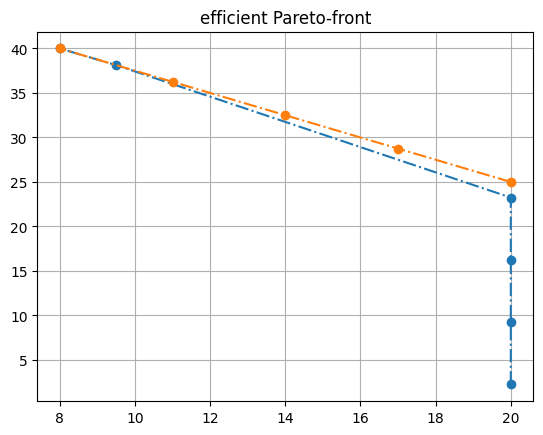

In [ ]:
# multiple objectives
from pyomo.environ import *
import matplotlib.pyplot as plt


# max f1 = X1 <br>
# max f2 = 3 X1 + 4 X2 <br>
# st  X1 <= 20 <br>
#     X2 <= 40 <br>
#     5 X1 + 4 X2 <= 200 <br>

model = ConcreteModel()

model.X1 = Var(within=NonNegativeReals)
model.X2 = Var(within=NonNegativeReals)
model.C1 = Constraint(expr = model.X1 <= 20)
model.C2 = Constraint(expr = model.X2 <= 40)
model.C3 = Constraint(expr = 5 * model.X1 + 4 * model.X2 <= 200)
model.f1 = Var()
model.f2 = Var()
model.C_f1 = Constraint(expr= model.f1 == model.X1)
model.C_f2 = Constraint(expr= model.f2 == 3 * model.X1 + 4 * model.X2)

model.O_f1 = Objective(expr= model.f1  , sense=maximize)
model.O_f2 = Objective(expr= model.f2  , sense=maximize)

model.O_f2.deactivate()

solver = SolverFactory('ipopt')
solver.solve(model);

print( '( X1 , X2 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' )')
print( 'f1 = ' + str(value(model.f1)) )
print( 'f2 = ' + str(value(model.f2)) )
f2_min = value(model.f2)


# ## max f2

model.O_f2.activate()
model.O_f1.deactivate()

solver = SolverFactory('ipopt')
solver.solve(model);

print( '( X1 , X2 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' )')
print( 'f1 = ' + str(value(model.f1)) )
print( 'f2 = ' + str(value(model.f2)) )
f2_max = value(model.f2)


# ## apply normal $\epsilon$-Constraint

model.O_f1.activate()
model.O_f2.deactivate()

model.e = Param(initialize=0, mutable=True)

model.C_epsilon = Constraint(expr = model.f2 == model.e)

solver.solve(model);

print('Each iteration will keep f2 lower than some values between f2_min and f2_max, so ['       + str(f2_min) + ', ' + str(f2_max) + ']')

n = 4
step = int((f2_max - f2_min) / n)
steps = list(range(int(f2_min),int(f2_max),step)) + [f2_max]

x1_l = []
x2_l = []
for i in steps:
    model.e = i
    solver.solve(model);
    x1_l.append(value(model.X1))
    x2_l.append(value(model.X2))
plt.plot(x1_l,x2_l,'o-.');
plt.title('inefficient Pareto-front');
plt.grid(True);


# ## apply augmented $\epsilon$-Constraint

# max   f2 + delta*epsilon <br>
#  s.t. f2 - s = e

model.del_component(model.O_f1)
model.del_component(model.O_f2)
model.del_component(model.C_epsilon)

model.delta = Param(initialize=0.00001)

model.s = Var(within=NonNegativeReals)

model.O_f1 = Objective(expr = model.f1 + model.delta * model.s, sense=maximize)

model.C_e = Constraint(expr = model.f2 - model.s == model.e)

x1_l = []
x2_l = []
for i in range(160,190,6):
    model.e = i
    solver.solve(model);
    x1_l.append(value(model.X1))
    x2_l.append(value(model.X2))
plt.plot(x1_l,x2_l,'o-.');
plt.title('efficient Pareto-front');
plt.grid(True);

In [1]:
import numpy as np
a = np.ones((5,6))
print(sum(a[i,j] for i in range(5) for j in range(6)))

30.0
